# Math Question Answer Verification Competition

## Starter Code

Borrowed from [official Unsloth implementation](https://colab.research.google.com/drive/1Ys44kVvmeZtnICzWz0xgpRnrIOjZAuxp?usp=sharing#scrollTo=MKX_XKs_BNZR)

In [ ]:
# Code Description
# this code is used to train model which was trained on base model with learning rate 2e-4 and 32000 samples
# instead of loading original lora model it loads trained lora model from previous step
# generate another 300*16*4 random banlanced samples and continue traing the model with learning rate 1e-4


In [ ]:
# # %%capture
# # This cell will take time
!pip install unsloth
# # Also get the latest nightly Unsloth!
!pip uninstall unsloth -y && pip install --upgrade --no-cache-dir "unsloth[colab-new] @ git+https://github.com/unslothai/unsloth.git"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.9/163.9 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 32.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 55.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.5/209.5 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.9/310.9 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 91.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.4/906.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 98.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 75.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Found existing installation: unsloth 2024.11.7
Uninstalling unsloth-2024.11.7:
  Successfully uninstalled unsloth-2024.11.7
  Cloning https://github.com/unslothai/unsloth.git to /tmp/pip-install-384lklbh/unsloth_57e19b5020684c33a8088a277663e69b
  Running command git clone --filter=blob:none --quiet https://github.com/unslothai/unsloth.git /tmp/pip-install-384lklbh/unsloth_57e19b5020684c33a8088a277663e69b
  Resolved https://github.com/unslothai/unsloth.git to commit f26d4e739ed507de7a9088da53d10fd02f58d160
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for unsloth: filename=unsloth-2024.11.7-py3-none-any.whl size=163138 sha256=35fcd7863b9b4eb8da42162a6cc25ecde143adfac394e1fa282e302d3f8e4de4
  Stored in directory: /tmp/pip-ephem-wheel-cache-9oglbtzf/wheels/ed/d4/e9/76fb290ee3df0a5fc21ce5c2c788e29e9607a2353d8342fd0d
Successfully built unsloth


In [ ]:
max_seq_length = 1024 # Choose any
dtype = None # None for auto detection. Float16 for Tesla T4, V100, Bfloat16 for Ampere+
load_in_4bit = False # Use 4bit quantization to reduce memory usage. Can be False.
max_steps=500 # 500*16*4=32000 datapoints

In [ ]:
from unsloth import FastLanguageModel
import torch

# 加载Meta-Llama-3.1-8B预训练模型
model, tokenizer = FastLanguageModel.from_pretrained(
    model_name = "/content/lr2e-4_step500_lora",
    max_seq_length = max_seq_length,
    dtype = dtype,
    load_in_4bit = load_in_4bit,
)

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
==((====))==  Unsloth 2024.11.7: Fast Llama patching. Transformers = 4.46.2.
   \\   /|    GPU: NVIDIA A100-SXM4-40GB. Max memory: 39.564 GB. Platform = Linux.
O^O/ \_/ \    Pytorch: 2.5.1+cu124. CUDA = 8.0. CUDA Toolkit = 12.4.
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.28.post3. FA2 = False]
 "-____-"     Free Apache license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/1.17G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/230 [00:00<?, ?B/s]

Unsloth 2024.11.7 patched 32 layers with 32 QKV layers, 32 O layers and 32 MLP layers.


## Load model and wrap with LoRA adapters

In [ ]:
model = FastLanguageModel.get_peft_model(
    model,
    r = 16, # Choose any number > 0 ! Suggested 8, 16, 32, 64, 128
    target_modules = ["q_proj", "k_proj", "v_proj", "o_proj",
                      "gate_proj", "up_proj", "down_proj",],
    lora_alpha = 16,
    lora_dropout = 0, # Supports any, but = 0 is optimized
    bias = "none",    # Supports any, but = "none" is optimized
    # [NEW] "unsloth" uses 30% less VRAM, fits 2x larger batch sizes!
    use_gradient_checkpointing = "unsloth", # True or "unsloth" for very long context
    random_state = 3407,
    use_rslora = False,  # We support rank stabilized LoRA
    loftq_config = None, # And LoftQ
)

Unsloth: Already have LoRA adapters! We shall skip this step.


## Competition dataset

In [ ]:
# download and load competition dataset
import numpy as np
torch.manual_seed(3407)
np.random.seed(3407)
from datasets import load_dataset
full_dataset = load_dataset("ad6398/nyu-dl-teach-maths-comp")
dataset = full_dataset['train'].shuffle(seed=3407)

README.md:   0%|          | 0.00/2.09k [00:00<?, ?B/s]

train-00000-of-00002.parquet:   0%|          | 0.00/195M [00:00<?, ?B/s]

train-00001-of-00002.parquet:   0%|          | 0.00/195M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/3.65M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1000000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

In [ ]:
prompt = """You are a great mathematician and you are tasked with finding if an answer to a given maths question is correct or not.
Follow these steps to verify if the given answer is correct.

### [Step 1] Task Description
Carefully read the question to understand the type of mathematical problem.
Question:
{}

### [Step 2]Check the given answer
Examine the provided answer below to determine if it is mathematically equivalent to the computed solution.
Given Answer:
{}

### [Step 3] Verify and solve step by step
- Check if all given information is used correctly
- Verify calculations and mathematical operations
Step-by-step verification:
{}

###[Step 4] After completing the verification steps, respond ONLY with "True" if correct, or "False" if it is not.
Output:
{}"""

EOS_TOKEN = tokenizer.eos_token # Must add EOS_TOKEN
def formatting_prompts_func(examples):
    question = examples["question"]
    ans       = examples["answer"]
    solution  = examples["solution"]
    output      = examples["is_correct"]
    texts = []
    for instruction, input,solution, output in zip(question, ans,solution, output):
        # Must add EOS_TOKEN, otherwise your generation will go on forever!
        # text = prompt.format(instruction, input, output) + EOS_TOKEN
        text = prompt.format(instruction, input, solution, output) + EOS_TOKEN
        texts.append(text)
    return { "text" : texts, }

Filter:   0%|          | 0/1000000 [00:00<?, ? examples/s]

Filter:   0%|          | 0/1000000 [00:00<?, ? examples/s]


Creating balanced dataset for 19,200 total samples:
Will use 9,600 samples from each class

Original dataset statistics:
True: 400,000 (40.0%)
False: 600,000 (60.0%)

Balanced dataset statistics:
True: 9,600 (50.0%)
False: 9,600 (50.0%)


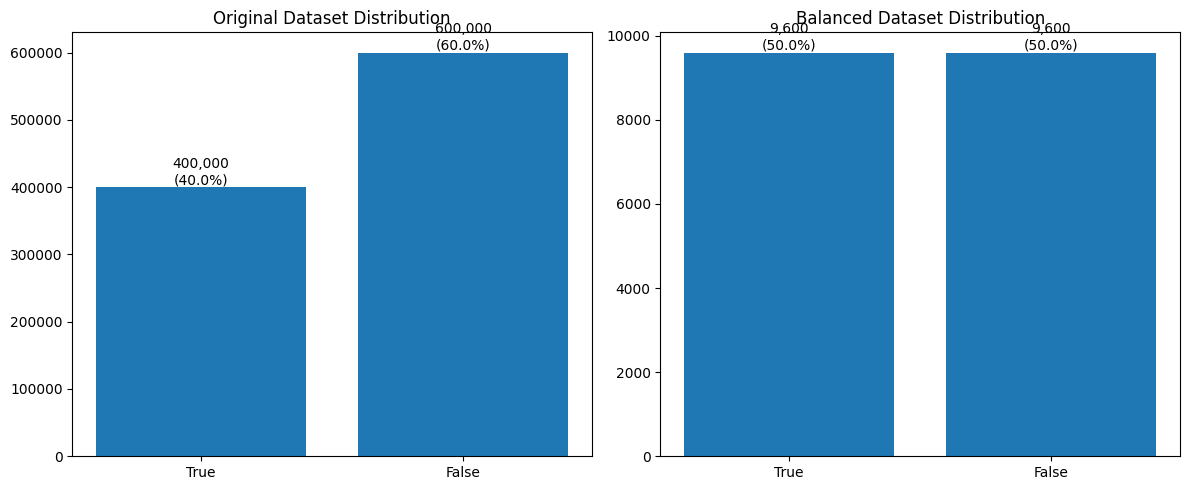

Map (num_proc=4):   0%|          | 0/19200 [00:00<?, ? examples/s]

'You are a great mathematician and you are tasked with finding if an answer to a given maths question is correct or not.\nFollow these steps to verify if the given answer is correct.\n\n### [Step 1] Task Description\nCarefully read the question to understand the type of mathematical problem.\nQuestion:\nWhat is the least value of $y$ such that $3y^2 + 5y + 2 = 4$?\n\n### [Step 2]Check the given answer\nExamine the provided answer below to determine if it is mathematically equivalent to the computed solution.\nGiven Answer:\n-2\n\n### [Step 3] Verify and solve step by step\n- Check if all given information is used correctly\n- Verify calculations and mathematical operations\nStep-by-step verification:\nWe solve the equation and choose the value of $y$ that\'s smaller.\n<llm-code>\nimport sympy as sp\n\ny = sp.symbols(\'y\')\n\nequation = 3*y**2 + 5*y + 2 - 4\n\nsolutions = sp.solve(equation, y)\n\n# print out the solutions sorted by value\nprint(sorted(solutions))\n</llm-code>\n<llm-cod

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datasets import Dataset
from collections import Counter

def create_balanced_training_subset(dataset, max_steps, batch_size, grad_accum_steps):
    # Calculate total samples needed for training
    samples_needed = max_steps * batch_size * grad_accum_steps

    # Separate True and False samples
    true_samples = dataset.filter(lambda x: x['is_correct'] == True)
    false_samples = dataset.filter(lambda x: x['is_correct'] == False)

    # Calculate how many samples to take from each class
    samples_per_class = samples_needed // 2

    print(f"\nCreating balanced dataset for {samples_needed:,} total samples:")
    print(f"Will use {samples_per_class:,} samples from each class")

    # Take balanced samples from each class
    true_indices = np.random.choice(len(true_samples), samples_per_class, replace=False)
    false_indices = np.random.choice(len(false_samples), samples_per_class, replace=False)

    # Select the samples
    balanced_true = true_samples.select(true_indices)
    balanced_false = false_samples.select(false_indices)

    # Combine and shuffle
    balanced_dataset = Dataset.from_dict({
        'question': balanced_true['question'] + balanced_false['question'],
        'answer': balanced_true['answer'] + balanced_false['answer'],
        'solution': balanced_true['solution'] + balanced_false['solution'],
        'is_correct': balanced_true['is_correct'] + balanced_false['is_correct']
    })

    # Shuffle the dataset
    balanced_dataset = balanced_dataset.shuffle(seed=42)

    # Print statistics
    print("\nOriginal dataset statistics:")
    original_counts = Counter(dataset['is_correct'])
    print(f"True: {original_counts[True]:,} ({original_counts[True]/len(dataset)*100:.1f}%)")
    print(f"False: {original_counts[False]:,} ({original_counts[False]/len(dataset)*100:.1f}%)")

    print("\nBalanced dataset statistics:")
    balanced_counts = Counter(balanced_dataset['is_correct'])
    print(f"True: {balanced_counts[True]:,} ({balanced_counts[True]/len(balanced_dataset)*100:.1f}%)")
    print(f"False: {balanced_counts[False]:,} ({balanced_counts[False]/len(balanced_dataset)*100:.1f}%)")

    # Visualize the balance
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Original distribution
    orig_counts = [original_counts[True], original_counts[False]]
    ax1.bar(['True', 'False'], orig_counts)
    ax1.set_title('Original Dataset Distribution')
    for i, count in enumerate(orig_counts):
        ax1.text(i, count, f'{count:,}\n({count/len(dataset)*100:.1f}%)',
                ha='center', va='bottom')

    # Balanced distribution
    bal_counts = [balanced_counts[True], balanced_counts[False]]
    ax2.bar(['True', 'False'], bal_counts)
    ax2.set_title('Balanced Dataset Distribution')
    for i, count in enumerate(bal_counts):
        ax2.text(i, count, f'{count:,}\n({count/len(balanced_dataset)*100:.1f}%)',
                ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

    return balanced_dataset

# Create balanced dataset with your parameters
balanced_dataset = create_balanced_training_subset(
    dataset=dataset,
    max_steps=max_steps,
    batch_size=16,
    grad_accum_steps=4
)

# Process the training dataset and generate prompt for each datapoint
train_dataset = balanced_dataset.map(
    formatting_prompts_func,
    batched=True,
    batch_size=64,
    num_proc=4,
    load_from_cache_file=False,
)

#print a smaple training example
train_dataset['text'][0]

## SFT

In [ ]:
# # Free up memory before training
# torch.cuda.empty_cache()
# gc.collect()

# # Enable expandable segments (optional, as already in the original code)
# os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"


In [ ]:
from trl import SFTTrainer
from transformers import TrainingArguments
from unsloth import is_bfloat16_supported
from transformers import Trainer, TrainingArguments, EarlyStoppingCallback

torch.cuda.empty_cache()
# 与训练有关的重要参数都在这边调
# small_train_dataset = train_dataset.select(range(10000))  # 取数据集的一个小样本例如使用前10000个样本
trainer = SFTTrainer(
    model = model,
    tokenizer = tokenizer,
    train_dataset = train_dataset,
    dataset_text_field = "text",
    max_seq_length = max_seq_length,
    dataset_num_proc = 4,
    packing = False, # Can make training 5x faster for short sequences.
    args = TrainingArguments(
        per_device_train_batch_size = 16,
        gradient_accumulation_steps = 4,
        warmup_steps = 10,
        num_train_epochs = 10, # Set this for 1 full training run.
        max_steps = max_steps,
        learning_rate = 1e-4, #changed from 2e-4, continue training based on /content/lr2e-4_step500_lora
        fp16 = not is_bfloat16_supported(),
        bf16 = is_bfloat16_supported(),
        logging_steps = 1,
        optim = "adamw_8bit",
        weight_decay = 0.01,
        lr_scheduler_type = "linear",
        seed = 3407,
        output_dir = "outputs",
        report_to = "none", # Use this for WandB etc
    )
)

Map (num_proc=4):   0%|          | 0/19200 [00:00<?, ? examples/s]

max_steps is given, it will override any value given in num_train_epochs


In [ ]:
# del inputs
# del outputs
# del trainer_stats
# del tokenizer
# del model
# torch.cuda.empty_cache()
# gc.collect()

In [ ]:
PYTORCH_CUDA_ALLOC_CONF=expandable_segments=True
torch.cuda.empty_cache()
trainer_stats = trainer.train()

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs = 1
   \\   /|    Num examples = 19,200 | Num Epochs = 1
O^O/ \_/ \    Batch size per device = 16 | Gradient Accumulation steps = 4
\        /    Total batch size = 64 | Total steps = 300
 "-____-"     Number of trainable parameters = 41,943,040


Step,Training Loss
1,0.461300
2,0.463800
3,0.468800
4,0.435300
5,0.435300
6,0.436800
7,0.444800
8,0.508000
9,0.428600
10,0.532100


## Saving model

In [ ]:
model.save_pretrained("lora_model") # Local saving
tokenizer.save_pretrained("lora_model")

('lora_model/tokenizer_config.json',
 'lora_model/special_tokens_map.json',
 'lora_model/tokenizer.json')

In [ ]:
# Sample inferene data point
test_dataset = full_dataset['test']
sample_ques = test_dataset['question'][0]
sample_sols = test_dataset['solution'][0]
sample_ans = test_dataset['answer'][0]

## inference

In [ ]:
# del outputs
# del tokenizer
# del trainer
# del trainer_stats

In [ ]:
torch.cuda.empty_cache()
if True:
    from unsloth import FastLanguageModel
    model, tokenizer = FastLanguageModel.from_pretrained(
        model_name = "lora_model", # YOUR MODEL YOU USED FOR TRAINING
        max_seq_length = max_seq_length,
        dtype = dtype,
        load_in_4bit = load_in_4bit,
        # llm_int8_enable_fp32_cpu_offload=True
    )
    FastLanguageModel.for_inference(model) # Enable native 2x faster inference


==((====))==  Unsloth 2024.11.7: Fast Llama patching. Transformers = 4.46.2.
   \\   /|    GPU: NVIDIA A100-SXM4-40GB. Max memory: 39.564 GB. Platform = Linux.
O^O/ \_/ \    Pytorch: 2.5.1+cu124. CUDA = 8.0. CUDA Toolkit = 12.4.
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.28.post3. FA2 = False]
 "-____-"     Free Apache license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# Running inference on single test
FastLanguageModel.for_inference(model) # Enable native 2x faster inference
input_prompt = prompt.format(
        sample_ques, # ques
        sample_ans, # given answer
        sample_sols, # solution
        "", # output - leave this blank for generation! LLM willl generate is it is True or False
    )

print("Input Promt:\n", input_prompt)
inputs = tokenizer(
[
    input_prompt
], return_tensors = "pt").to("cuda")

input_shape = inputs['input_ids'].shape
input_token_len = input_shape[1] # 1 because of batch
outputs = model.generate(**inputs, max_new_tokens = 64, use_cache = True, top_p=0.9).to("cuda")
# you can get the whole generated text by uncommenting the below line
# text_generated = tokenizer.batch_decode([outputs, skip_special_tokens=True)

response = tokenizer.batch_decode([outputs[0][input_token_len:]], skip_special_tokens=True)
response

Input Promt:
 You are a great mathematician and you are tasked with finding if an answer to a given maths question is correct or not.
Follow these steps to verify if the given answer is correct.

### [Step 1] Task Description
Carefully read the question to understand the type of mathematical problem.
Question:
The Parker family needs to leave the house by 5 pm for a dinner party. Mrs. Parker was waiting to get into the bathroom at 2:30 pm. Her oldest daughter used the bathroom for 45 minutes and her youngest daughter used the bathroom for another 30 minutes. Then her husband used it for 20 minutes. How much time will Mrs. Parker have to use the bathroom to leave on time?

### [Step 2]Check the given answer
Examine the provided answer below to determine if it is mathematically equivalent to the computed solution.
Given Answer:
205

### [Step 3] Verify and solve step by step
- Check if all given information is used correctly
- Verify calculations and mathematical operations
Step-by-step 

['True']

In [ ]:
!pip install tqdm pandas

import os
import torch
from tqdm import tqdm
import pandas as pd
os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'expandable_segments:True'

In [ ]:
def create_submission(model, tokenizer, test_dataset, batch_size=4):
    FastLanguageModel.for_inference(model)
    predictions = []

    # Process test dataset in batches with progress bar
    for i in tqdm(range(0, len(test_dataset), batch_size), desc="Processing test dataset"):
        # Clear cache periodically
        if i % 100 == 0:
            torch.cuda.empty_cache()

        batch_end = min(i + batch_size, len(test_dataset))
        batch_questions = test_dataset['question'][i:batch_end]
        batch_solutions = test_dataset['solution'][i:batch_end]
        batch_answers = test_dataset['answer'][i:batch_end]

        # Create prompts for the batch
        batch_prompts = [
            prompt.format(q, a, s,"")
            for q, s, a in zip(batch_questions,batch_solutions,batch_answers)
        ]

        try:
            # Tokenize batch
            inputs = tokenizer(
                batch_prompts,
                return_tensors="pt",
                padding=True,
                truncation=True,
                max_length=512
            ).to("cuda")

            # Generate predictions
            with torch.inference_mode():
                outputs = model.generate(
                    **inputs,
                    max_new_tokens=64,
                    top_p=0.9,
                    use_cache=True,
                    pad_token_id=tokenizer.eos_token_id
                )

            # Process outputs
            for j in range(len(outputs)):
                input_len = len(inputs['input_ids'][j])
                response = tokenizer.decode(outputs[j][input_len:], skip_special_tokens=True).strip()
                prediction = True if 'True' in response.split()[0] else False
                predictions.append(prediction)

            # Clean up
            del inputs, outputs

        except RuntimeError as e:
            print(f"\nError in batch processing at index {i}. Switching to single example processing.")
            # Process examples one by one if batch fails
            for q, a,s in zip(batch_questions, batch_answers,batch_solutions):
                try:
                    single_prompt = prompt.format(q, a, s,"")
                    inputs = tokenizer([single_prompt], return_tensors="pt", truncation=True, max_length=512)
                    with torch.inference_mode():
                        outputs = model.generate(**inputs, max_new_tokens=64, top_p=0.9, use_cache=True)
                    response = tokenizer.decode(outputs[0][len(inputs['input_ids'][0]):], skip_special_tokens=True).strip()
                    prediction = True if 'True' in response.split()[0] else False
                    predictions.append(prediction)
                    del inputs, outputs
                    torch.cuda.empty_cache()
                except Exception as e:
                    print(f"\nError processing single example: {e}")
                    predictions.append(False)  # Default prediction in case of error

    # Create final submission DataFrame
    submission_df = pd.DataFrame({
        'ID': range(len(predictions)),
        'is_correct': predictions
    })

    if len(submission_df) != len(test_dataset):
        print(f"\nWarning: Number of predictions ({len(predictions)}) doesn't match test dataset size ({len(test_dataset)})")

    # Save submission
    submission_df.to_csv('submission.csv', index=False)
    print("\nSubmission saved successfully!")
    print(f"Total predictions: {len(predictions)}")
    print("\nFirst few predictions:")
    print(submission_df.head())

    return submission_df

# Clear GPU memory before running
print("Clearing GPU memory...")
torch.cuda.empty_cache()

# Create submission
test_dataset = full_dataset['test']
submission = create_submission(
    model=model,
    tokenizer=tokenizer,
    test_dataset=test_dataset,
    batch_size=25
)

Clearing GPU memory...


Processing test dataset: 100%|██████████| 400/400 [29:50<00:00,  4.48s/it]


Submission saved successfully!
Total predictions: 10000

First few predictions:
   ID  is_correct
0   0        True
1   1       False
2   2        True
3   3        True
4   4       False
